# Лаб. вежба 4

Стефан Милев - 206055


## Imports

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

## Functions

In [23]:
def get_reduced_df(real_df: pd.DataFrame, model: PCA | TSNE, n_components: int):
    reduced_df = pd.DataFrame()
    x = model.fit_transform(real_df)
    for n in range(n_components):
        reduced_df[f"x{n + 1}"] = x[:, n]
    return reduced_df


def plot(real_df: pd.DataFrame, color: np.ndarray):
    _, ax = plt.subplots(figsize=(20, 10))
    sns.scatterplot(x="x1", y="x2", data=real_df, hue=color, ax=ax)


def fit_summary(
    model,
    x_train: pd.DataFrame,
    x_test: pd.DataFrame,
    y_train: pd.DataFrame,
    y_test: pd.DataFrame,
    silent=False,
):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    if not silent:
        print(classification_report(y_test, y_pred))
    return accuracy_score(y_test, y_pred)

## Dataset

In [24]:
columns = [
    "lettr",
    "x-box",
    "y-box",
    "width",
    "high",
    "onpix",
    "x-bar",
    "y-bar",
    "x2bar",
    "y2bar",
    "xybar",
    "x2ybr",
    "xy2br",
    "x-ege",
    "xegvy",
    "y-ege",
    "yegvx",
]

In [25]:
reduced_df = pd.read_csv("letter-recognition.data", header=None, names=columns)
reduced_df

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [26]:
reduced_df.describe()


,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [27]:
reduced_df.isna().sum()

lettr    0
x-box    0
y-box    0
width    0
high     0
onpix    0
x-bar    0
y-bar    0
x2bar    0
y2bar    0
xybar    0
x2ybr    0
xy2br    0
x-ege    0
xegvy    0
y-ege    0
yegvx    0
dtype: int64

In [28]:
x = reduced_df.drop("lettr", axis=1)
y = reduced_df["lettr"]

## Visualizations

<ipython-input-29-c67b00164575>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = reduced_df.corr(method="pearson")


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 [Text(0, 0.5, 'x-box'),
  Text(0, 1.5, 'y-box'),
  Text(0, 2.5, 'width'),
  Text(0, 3.5, 'high'),
  Text(0, 4.5, 'onpix'),
  Text(0, 5.5, 'x-bar'),
  Text(0, 6.5, 'y-bar'),
  Text(0, 7.5, 'x2bar'),
  Text(0, 8.5, 'y2bar'),
  Text(0, 9.5, 'xybar'),
  Text(0, 10.5, 'x2ybr'),
  Text(0, 11.5, 'xy2br'),
  Text(0, 12.5, 'x-ege'),
  Text(0, 13.5, 'xegvy'),
  Text(0, 14.5, 'y-ege'),
  Text(0, 15.5, 'yegvx')])

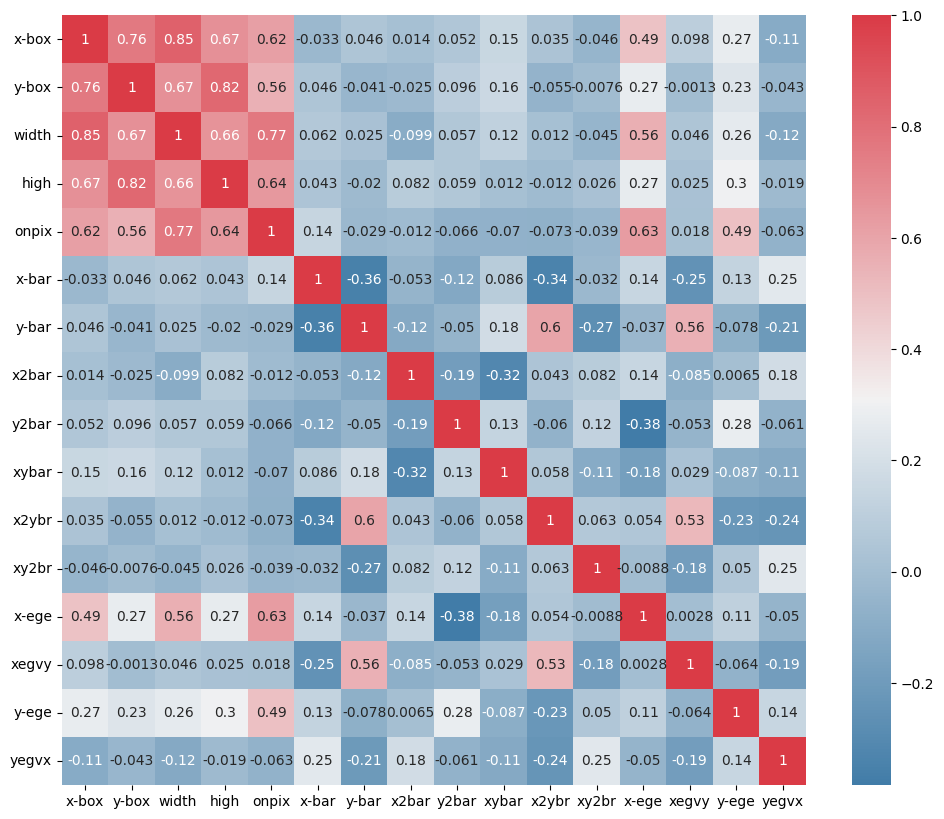

In [29]:
corr = reduced_df.corr(method="pearson")
_, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(240, 10, as_cmap=True), ax=ax)
plt.yticks(rotation=0)

<Axes: xlabel='lettr', ylabel='count'>

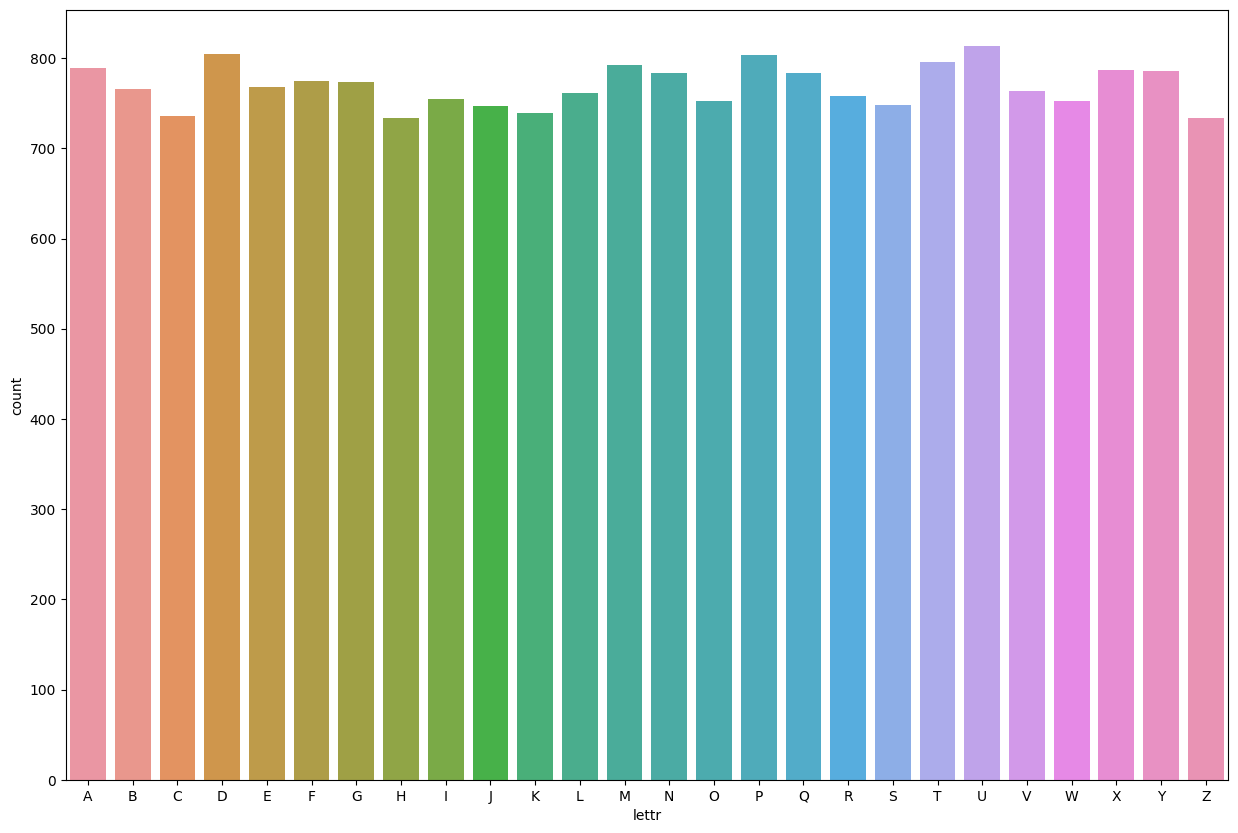

In [30]:
_, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x="lettr", data=reduced_df, ax=ax, order=sorted(reduced_df["lettr"].unique()))

## Dimension reduction

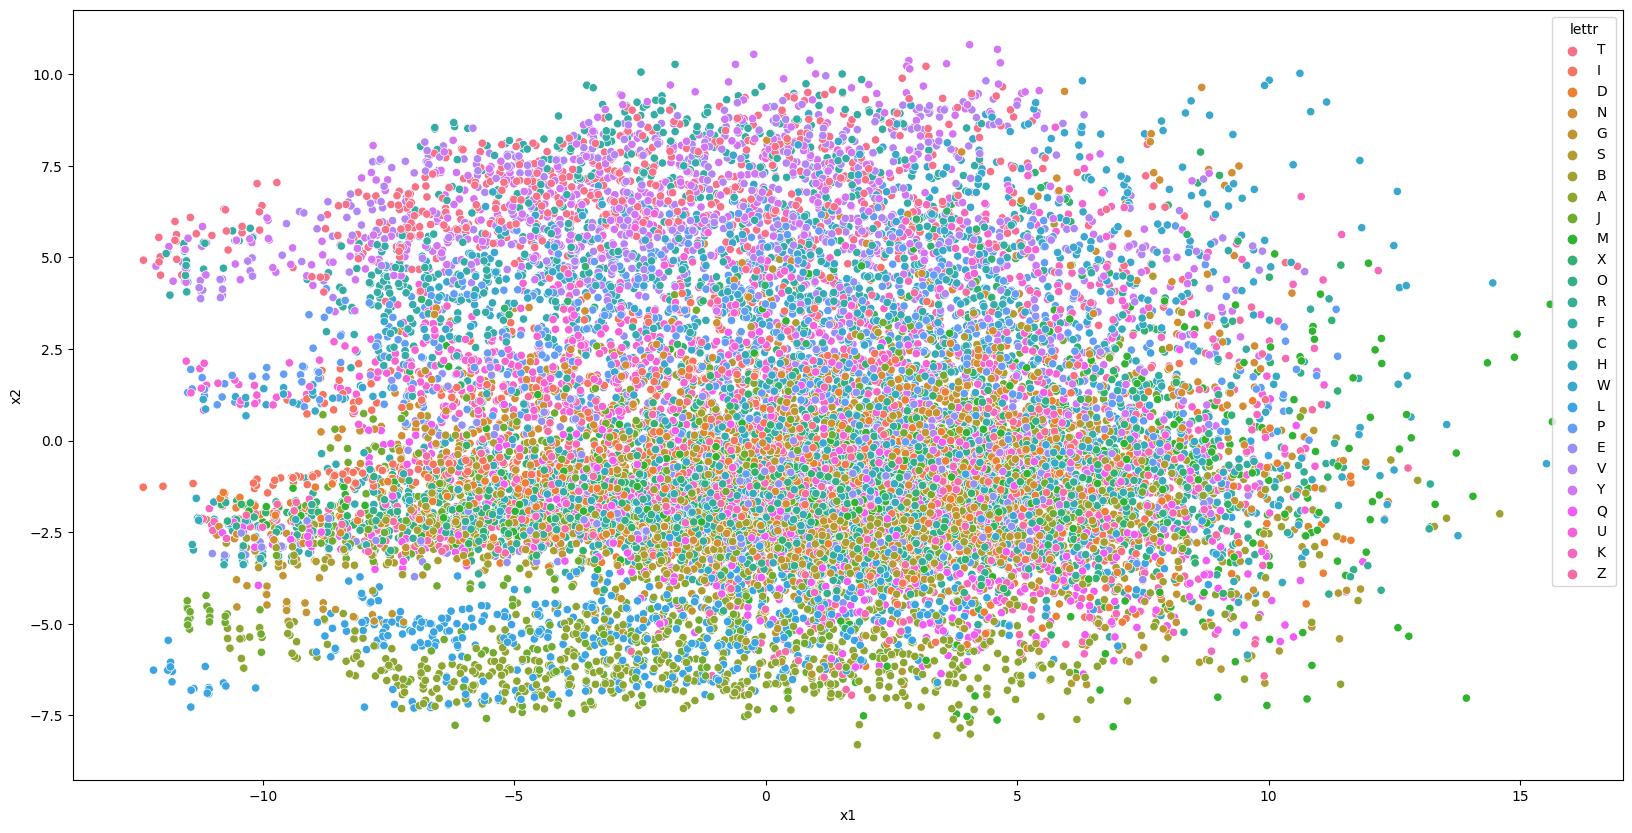

In [31]:
tsne = PCA()
x_tsne = get_reduced_df(x, tsne, 2)
plot(x_tsne, reduced_df["lettr"])

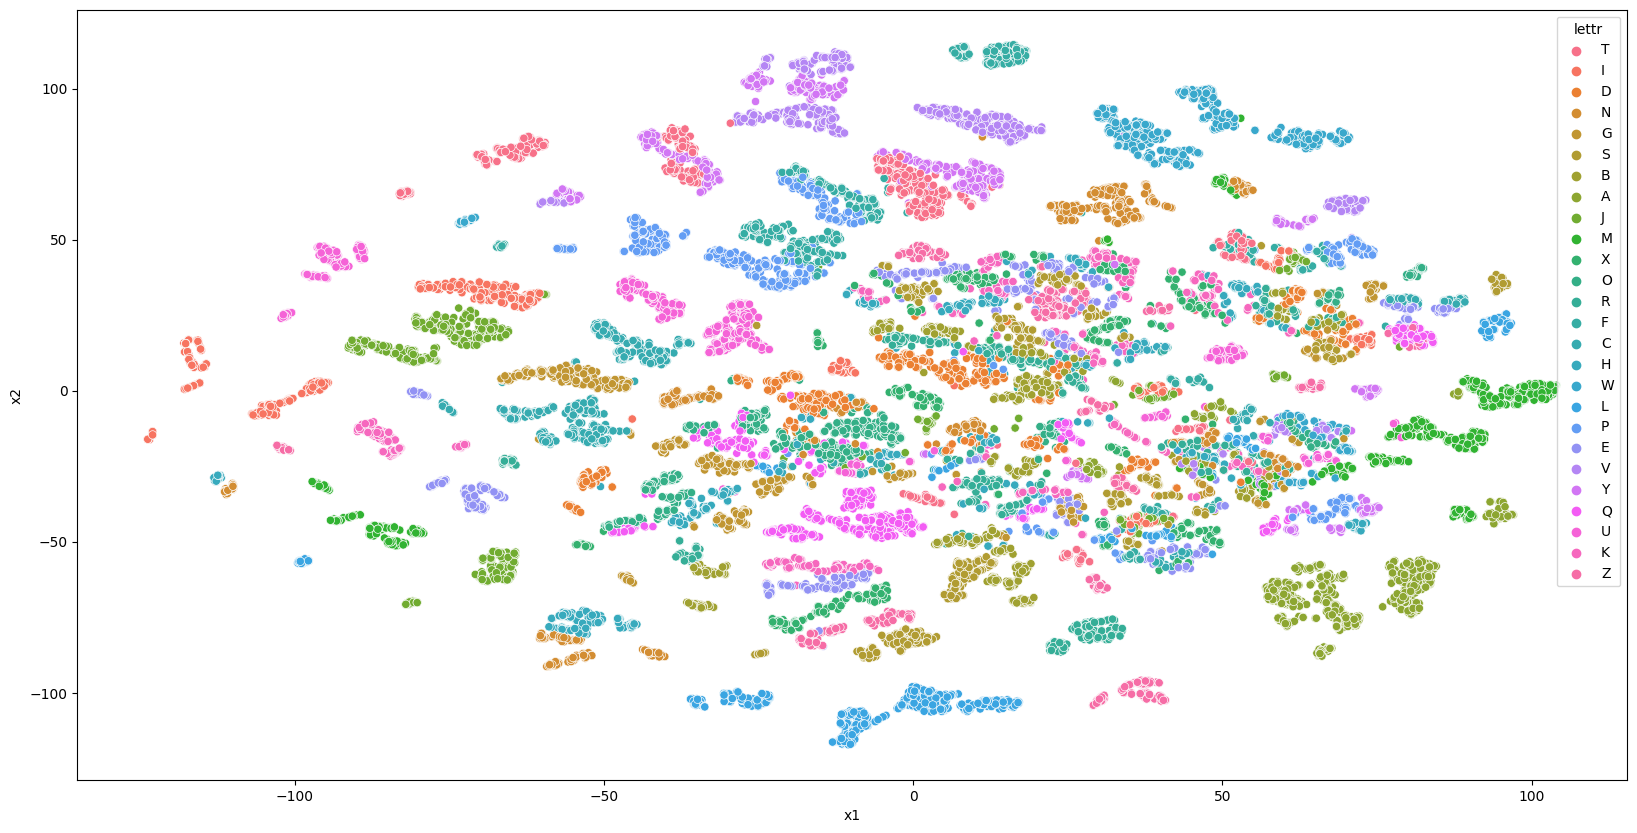

In [32]:
tsne = TSNE()
x_tsne = get_reduced_df(x, tsne, 2)
plot(x_tsne, reduced_df["lettr"])

## Train and test sets

In [33]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

## Scaling

In [34]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=columns[1:])
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=columns[1:])

In [35]:
x_train_scaled.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04
mean,1.316725e-16,-1.489919e-16,6.661338e-17,-7.194245e-17,-3.330669e-17,1.660894e-16,6.306067e-17,-3.197442e-17,-1.239009e-16,2.597922e-16,5.107026e-17,1.374456e-16,1.101341e-16,-1.452172e-16,5.329071e-18,-1.314504e-16
std,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00
min,-2.105226e+00,-2.131730e+00,-2.539899e+00,-2.372757e+00,-1.601051e+00,-3.396714e+00,-3.222279e+00,-1.709798e+00,-2.166145e+00,-3.326487e+00,-2.455891e+00,-3.806654e+00,-1.305886e+00,-5.400628e+00,-1.438394e+00,-4.825705e+00
25%,-5.359916e-01,-6.181740e-01,-5.560872e-01,-6.076616e-01,-6.877954e-01,-4.420326e-01,-6.425210e-01,-6.031477e-01,-4.934866e-01,-5.167633e-01,-5.519151e-01,-4.461914e-01,-8.770851e-01,-2.167509e-01,-6.589749e-01,-4.963317e-01
50%,-1.291349e-02,-1.275171e-02,-6.013429e-02,2.748860e-01,-2.311677e-01,5.041425e-02,-2.125613e-01,-2.342641e-01,-7.532191e-02,-1.153743e-01,-1.711199e-01,3.387466e-02,-1.948363e-02,-2.167509e-01,-2.692651e-01,1.221502e-01
75%,5.101646e-01,5.926706e-01,4.358186e-01,7.161598e-01,6.820875e-01,5.428611e-01,6.473580e-01,5.035030e-01,7.610075e-01,6.874038e-01,5.904707e-01,5.139407e-01,4.093171e-01,4.312338e-01,5.101545e-01,1.221502e-01
max,5.740945e+00,2.408937e+00,4.899395e+00,4.246350e+00,5.248364e+00,3.989989e+00,3.227116e+00,3.823455e+00,4.106325e+00,2.694349e+00,3.256038e+00,3.394337e+00,5.126125e+00,4.319142e+00,4.407252e+00,4.451523e+00


In [36]:
x_test_scaled.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.002975,-0.010027,0.001488,-0.010177,-0.000913,-0.000062,0.013060,-0.011920,-0.003084,-0.010812,0.008806,-0.001050,0.001420,0.014094,0.001583,-0.004020
std,1.003787,1.001588,0.995658,0.989373,1.001117,0.988519,0.998973,0.979642,0.977672,0.994171,1.009431,0.994158,1.000975,1.011135,1.002064,1.001872
min,-2.105226,-2.131730,-2.539899,-2.372757,-1.601051,-3.396714,-3.222279,-1.709798,-2.166145,-3.326487,-2.455891,-3.326588,-1.305886,-4.752643,-1.438394,-4.825705
25%,-0.535992,-0.618174,-0.556087,-0.607662,-0.687795,-0.442033,-0.642521,-0.603148,-0.493487,-0.516763,-0.551915,-0.446191,-0.448284,-0.216751,-0.658975,-0.496332
50%,-0.012913,-0.012752,-0.060134,0.274886,-0.231168,0.050414,-0.212561,-0.234264,-0.075322,-0.115374,-0.171120,0.033875,-0.019484,-0.216751,-0.269265,0.122150
75%,0.510165,0.592671,0.435819,0.716160,0.682088,0.542861,0.647358,0.503503,0.761007,0.687404,0.590471,0.513941,0.409317,0.431234,0.510154,0.740632
max,4.694789,2.408937,3.907489,4.246350,5.248364,3.497542,3.227116,3.823455,4.106325,2.694349,3.256038,3.394337,5.126125,4.319142,4.407252,3.833041


## Models

In [37]:
accuracies = {}

In [38]:
model = LinearDiscriminantAnalysis()
accuracy = fit_summary(model, x_train_scaled, x_test_scaled, y_train, y_test)
accuracies["LDA"] = accuracy

              precision    recall  f1-score   support

           A       0.88      0.87      0.88       149
           B       0.54      0.72      0.62       153
           C       0.62      0.70      0.66       137
           D       0.67      0.81      0.73       156
           E       0.69      0.42      0.52       141
           F       0.59      0.71      0.64       140
           G       0.56      0.56      0.56       160
           H       0.47      0.42      0.44       144
           I       0.82      0.82      0.82       146
           J       0.81      0.70      0.75       149
           K       0.58      0.65      0.61       130
           L       0.97      0.73      0.83       155
           M       0.88      0.89      0.89       168
           N       0.79      0.80      0.79       151
           O       0.62      0.70      0.66       145
           P       0.86      0.75      0.80       173
           Q       0.68      0.63      0.65       166
           R       0.64    

In [39]:
model = QuadraticDiscriminantAnalysis()
accuracy = fit_summary(model, x_train_scaled, x_test_scaled, y_train, y_test)
accuracies["QDA"] = accuracy

              precision    recall  f1-score   support

           A       0.95      0.96      0.96       149
           B       0.84      0.90      0.87       153
           C       0.90      0.86      0.88       137
           D       0.83      0.93      0.88       156
           E       0.92      0.84      0.88       141
           F       0.85      0.89      0.87       140
           G       0.82      0.85      0.83       160
           H       0.84      0.64      0.73       144
           I       0.95      0.85      0.90       146
           J       0.95      0.91      0.93       149
           K       0.76      0.82      0.79       130
           L       0.93      0.91      0.92       155
           M       0.91      0.96      0.93       168
           N       0.99      0.87      0.93       151
           O       0.80      0.88      0.84       145
           P       0.95      0.92      0.93       173
           Q       0.90      0.90      0.90       166
           R       0.77    

In [40]:
model = GaussianNB()
accuracy = fit_summary(model, x_train_scaled, x_test_scaled, y_train, y_test)
accuracies["NB"] = accuracy

              precision    recall  f1-score   support

           A       0.86      0.91      0.88       149
           B       0.51      0.69      0.59       153
           C       0.70      0.70      0.70       137
           D       0.60      0.78      0.68       156
           E       0.62      0.40      0.48       141
           F       0.65      0.74      0.69       140
           G       0.55      0.54      0.55       160
           H       0.51      0.31      0.39       144
           I       0.56      0.77      0.65       146
           J       0.84      0.74      0.79       149
           K       0.49      0.45      0.47       130
           L       0.99      0.76      0.86       155
           M       0.70      0.90      0.79       168
           N       0.89      0.67      0.77       151
           O       0.48      0.74      0.58       145
           P       0.89      0.73      0.80       173
           Q       0.63      0.55      0.59       166
           R       0.56    

In [41]:
model = LogisticRegression(solver="liblinear", random_state=42)
accuracy = fit_summary(model, x_train_scaled, x_test_scaled, y_train, y_test)
accuracies["Logistic Regression"] = accuracy

              precision    recall  f1-score   support

           A       0.84      0.87      0.86       149
           B       0.62      0.72      0.67       153
           C       0.72      0.73      0.72       137
           D       0.72      0.81      0.76       156
           E       0.74      0.69      0.71       141
           F       0.73      0.72      0.73       140
           G       0.57      0.45      0.50       160
           H       0.39      0.35      0.37       144
           I       0.85      0.82      0.83       146
           J       0.83      0.81      0.82       149
           K       0.57      0.56      0.57       130
           L       0.83      0.80      0.81       155
           M       0.90      0.88      0.89       168
           N       0.80      0.68      0.74       151
           O       0.59      0.61      0.60       145
           P       0.87      0.83      0.85       173
           Q       0.66      0.75      0.70       166
           R       0.64    

In [42]:
model = LinearSVC(dual=False, random_state=42)
accuracy = fit_summary(model, x_train_scaled, x_test_scaled, y_train, y_test)
accuracies["Linear SVC"] = accuracy

              precision    recall  f1-score   support

           A       0.84      0.89      0.86       149
           B       0.60      0.75      0.66       153
           C       0.62      0.74      0.67       137
           D       0.71      0.80      0.75       156
           E       0.72      0.56      0.63       141
           F       0.79      0.69      0.73       140
           G       0.65      0.33      0.43       160
           H       0.32      0.27      0.29       144
           I       0.82      0.82      0.82       146
           J       0.79      0.77      0.78       149
           K       0.54      0.54      0.54       130
           L       0.77      0.78      0.77       155
           M       0.85      0.89      0.87       168
           N       0.71      0.71      0.71       151
           O       0.67      0.44      0.53       145
           P       0.84      0.84      0.84       173
           Q       0.62      0.74      0.68       166
           R       0.59    

In [43]:
model = KNeighborsClassifier(1)
accuracy = fit_summary(model, x_train_scaled, x_test_scaled, y_train, y_test)
accuracies["KNN 1"] = accuracy

              precision    recall  f1-score   support

           A       0.99      1.00      0.99       149
           B       0.90      0.93      0.91       153
           C       0.96      0.98      0.97       137
           D       0.94      0.95      0.94       156
           E       0.90      0.94      0.92       141
           F       0.91      0.90      0.91       140
           G       0.97      0.94      0.96       160
           H       0.90      0.85      0.87       144
           I       0.97      0.92      0.95       146
           J       0.93      0.96      0.94       149
           K       0.90      0.88      0.89       130
           L       0.97      0.97      0.97       155
           M       0.98      0.99      0.99       168
           N       0.99      0.94      0.97       151
           O       0.93      0.95      0.94       145
           P       0.95      0.92      0.94       173
           Q       0.97      0.94      0.95       166
           R       0.89    

In [44]:
model = KNeighborsClassifier(2)
accuracy = fit_summary(model, x_train_scaled, x_test_scaled, y_train, y_test)
accuracies["KNN 2"] = accuracy

              precision    recall  f1-score   support

           A       0.97      1.00      0.98       149
           B       0.81      0.96      0.88       153
           C       0.94      0.99      0.96       137
           D       0.84      0.98      0.90       156
           E       0.82      0.94      0.87       141
           F       0.85      0.94      0.89       140
           G       0.94      0.94      0.94       160
           H       0.85      0.84      0.85       144
           I       0.95      0.95      0.95       146
           J       0.95      0.95      0.95       149
           K       0.86      0.84      0.85       130
           L       0.97      0.97      0.97       155
           M       0.98      0.97      0.98       168
           N       0.98      0.93      0.95       151
           O       0.94      0.96      0.95       145
           P       0.97      0.88      0.92       173
           Q       0.99      0.93      0.96       166
           R       0.94    

In [45]:
model = KNeighborsClassifier(3)
accuracy = fit_summary(model, x_train_scaled, x_test_scaled, y_train, y_test)
accuracies["KNN 3"] = accuracy

              precision    recall  f1-score   support

           A       0.97      1.00      0.99       149
           B       0.84      0.97      0.90       153
           C       0.95      0.96      0.96       137
           D       0.85      0.97      0.91       156
           E       0.89      0.93      0.91       141
           F       0.89      0.92      0.91       140
           G       0.94      0.94      0.94       160
           H       0.89      0.81      0.85       144
           I       0.99      0.95      0.97       146
           J       0.94      0.97      0.95       149
           K       0.91      0.86      0.89       130
           L       0.98      0.97      0.97       155
           M       0.98      0.98      0.98       168
           N       0.96      0.91      0.93       151
           O       0.95      0.95      0.95       145
           P       0.97      0.90      0.94       173
           Q       0.98      0.95      0.97       166
           R       0.91    

In [46]:
model = MLPClassifier(
    solver="adam", hidden_layer_sizes=(100,), max_iter=1000, random_state=42
)
accuracy = fit_summary(model, x_train_scaled, x_test_scaled, y_train, y_test)
accuracies["MLP 100"] = accuracy

              precision    recall  f1-score   support

           A       0.97      0.99      0.98       149
           B       0.93      0.95      0.94       153
           C       0.95      0.93      0.94       137
           D       0.96      0.97      0.97       156
           E       0.94      0.96      0.95       141
           F       0.94      0.94      0.94       140
           G       0.93      0.96      0.94       160
           H       0.93      0.88      0.90       144
           I       0.99      0.94      0.96       146
           J       0.94      0.97      0.95       149
           K       0.94      0.93      0.93       130
           L       0.96      0.97      0.96       155
           M       0.99      0.98      0.99       168
           N       0.97      0.94      0.95       151
           O       0.94      0.97      0.96       145
           P       0.98      0.96      0.97       173
           Q       0.98      0.97      0.98       166
           R       0.89    

In [47]:
model = MLPClassifier(
    solver="adam", hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42
)
accuracy = fit_summary(model, x_train_scaled, x_test_scaled, y_train, y_test)
accuracies["MLP 100, 50"] = accuracy

              precision    recall  f1-score   support

           A       0.99      0.98      0.99       149
           B       0.94      0.95      0.94       153
           C       0.95      0.95      0.95       137
           D       0.95      0.94      0.95       156
           E       0.92      0.95      0.93       141
           F       0.91      0.96      0.94       140
           G       0.97      0.92      0.95       160
           H       0.91      0.86      0.89       144
           I       0.98      0.93      0.95       146
           J       0.92      0.97      0.94       149
           K       0.86      0.95      0.90       130
           L       0.97      0.97      0.97       155
           M       0.99      0.99      0.99       168
           N       0.99      0.95      0.97       151
           O       0.96      0.99      0.98       145
           P       0.99      0.95      0.97       173
           Q       0.98      0.96      0.97       166
           R       0.91    

In [48]:
model = MLPClassifier(
    solver="adam", hidden_layer_sizes=(100, 50, 50, 50), max_iter=1000, random_state=42
)
accuracy = fit_summary(model, x_train_scaled, x_test_scaled, y_train, y_test)
accuracies["MLP 100, 50, 50, 50"] = accuracy

              precision    recall  f1-score   support

           A       0.98      0.98      0.98       149
           B       0.93      0.95      0.94       153
           C       0.94      0.91      0.93       137
           D       0.96      0.96      0.96       156
           E       0.92      0.96      0.94       141
           F       0.97      0.91      0.94       140
           G       0.96      0.93      0.95       160
           H       0.93      0.88      0.90       144
           I       0.95      0.97      0.96       146
           J       0.99      0.97      0.98       149
           K       0.91      0.95      0.93       130
           L       0.94      0.98      0.96       155
           M       0.99      0.98      0.98       168
           N       0.97      0.95      0.96       151
           O       0.92      0.99      0.95       145
           P       0.95      0.95      0.95       173
           Q       0.98      0.96      0.97       166
           R       0.93    

In [49]:
model = MLPClassifier(
    solver="adam", hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42
)
accuracy = fit_summary(model, x_train_scaled, x_test_scaled, y_train, y_test)
accuracies["MLP 100, 100"] = accuracy

              precision    recall  f1-score   support

           A       0.99      0.99      0.99       149
           B       0.94      0.95      0.94       153
           C       0.98      0.95      0.96       137
           D       0.95      0.96      0.95       156
           E       0.92      0.96      0.94       141
           F       0.96      0.94      0.95       140
           G       0.94      0.96      0.95       160
           H       0.92      0.91      0.91       144
           I       0.96      0.94      0.95       146
           J       0.95      0.98      0.97       149
           K       0.92      0.92      0.92       130
           L       0.98      0.97      0.97       155
           M       0.97      0.99      0.98       168
           N       0.97      0.93      0.95       151
           O       0.97      0.96      0.96       145
           P       0.97      0.98      0.97       173
           Q       0.99      0.98      0.98       166
           R       0.91    

In [50]:
model = DecisionTreeClassifier(random_state=42)
accuracy = fit_summary(model, x_train_scaled, x_test_scaled, y_train, y_test)
accuracies["Decision Tree"] = accuracy

              precision    recall  f1-score   support

           A       0.96      0.93      0.94       149
           B       0.83      0.84      0.83       153
           C       0.93      0.83      0.88       137
           D       0.82      0.90      0.86       156
           E       0.81      0.90      0.85       141
           F       0.79      0.84      0.81       140
           G       0.84      0.87      0.86       160
           H       0.75      0.80      0.77       144
           I       0.90      0.92      0.91       146
           J       0.89      0.89      0.89       149
           K       0.84      0.85      0.84       130
           L       0.92      0.92      0.92       155
           M       0.92      0.91      0.92       168
           N       0.93      0.87      0.90       151
           O       0.89      0.86      0.87       145
           P       0.92      0.88      0.90       173
           Q       0.88      0.84      0.86       166
           R       0.81    

In [51]:
model = RandomForestClassifier(random_state=42)
accuracy = fit_summary(model, x_train_scaled, x_test_scaled, y_train, y_test)
accuracies["Random Forest"] = accuracy

              precision    recall  f1-score   support

           A       0.98      1.00      0.99       149
           B       0.88      0.97      0.93       153
           C       0.99      0.92      0.95       137
           D       0.90      0.97      0.94       156
           E       0.90      0.99      0.94       141
           F       0.92      0.96      0.94       140
           G       0.98      0.96      0.97       160
           H       0.95      0.88      0.92       144
           I       0.99      0.92      0.96       146
           J       0.95      0.97      0.96       149
           K       0.94      0.89      0.92       130
           L       0.99      0.97      0.98       155
           M       0.97      0.99      0.98       168
           N       0.98      0.92      0.95       151
           O       0.95      0.95      0.95       145
           P       0.97      0.95      0.96       173
           Q       0.96      0.98      0.97       166
           R       0.90    

## Results

In [52]:
results = pd.DataFrame(accuracies.items(), columns=["Model", "Accuracy"])
results.sort_values(by="Accuracy", ascending=False, inplace=True)
results

,Model,Accuracy
11,"MLP 100, 100",0.96150
13,Random Forest,0.96075
8,MLP 100,0.95700
10,"MLP 100, 50, 50, 50",0.95650
9,"MLP 100, 50",0.95600
5,KNN 1,0.94800
7,KNN 3,0.94400
6,KNN 2,0.93550
1,QDA,0.88575
12,Decision Tree,0.88250


<Axes: xlabel='Accuracy', ylabel='Model'>

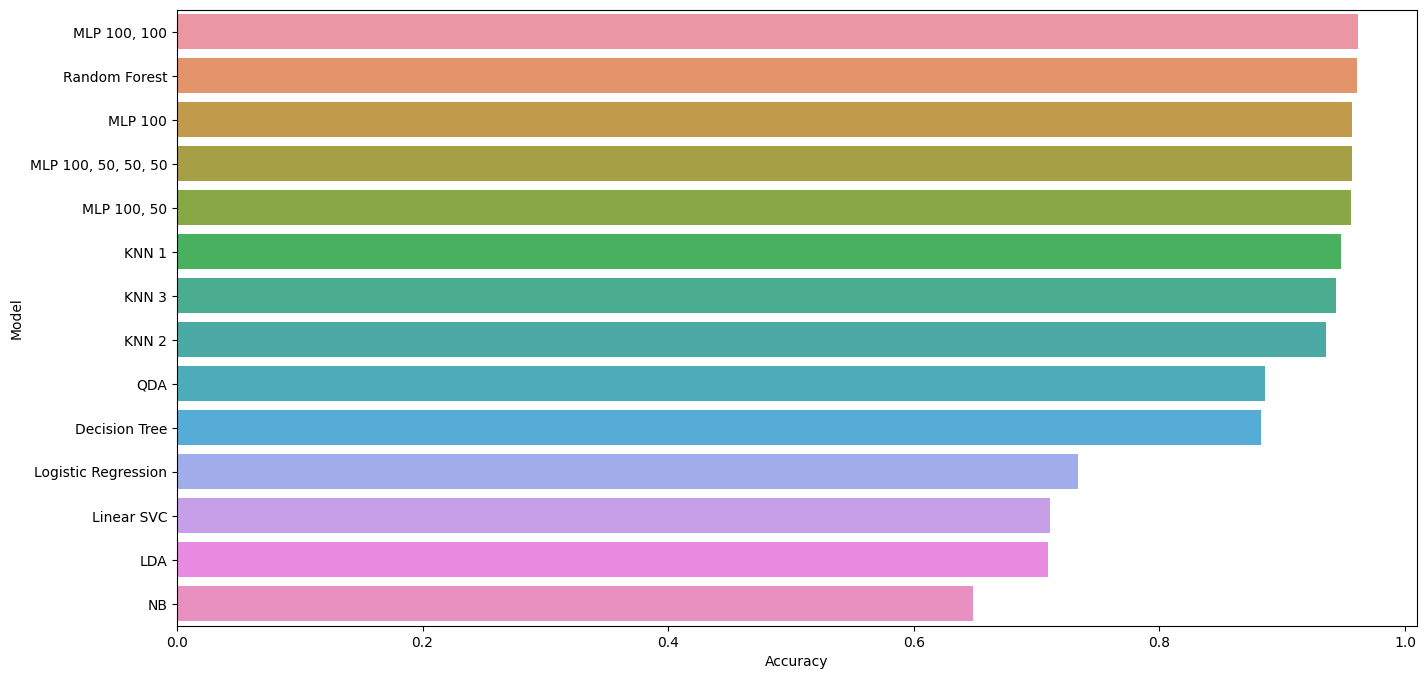

In [53]:
_, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x="Accuracy", y="Model", data=results, ax=ax)

The best models appear to be MLP, Random Forest, KNN.